In [ ]:
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('MKT.csv')

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
print(df.isnull().sum())

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64


In [ ]:
duplicatas = df[df.duplicated()]
print(duplicatas)

Empty DataFrame
Columns: [youtube, facebook, newspaper, sales]
Index: []


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
matriz_correlacao = df.corr()
matriz_correlacao

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


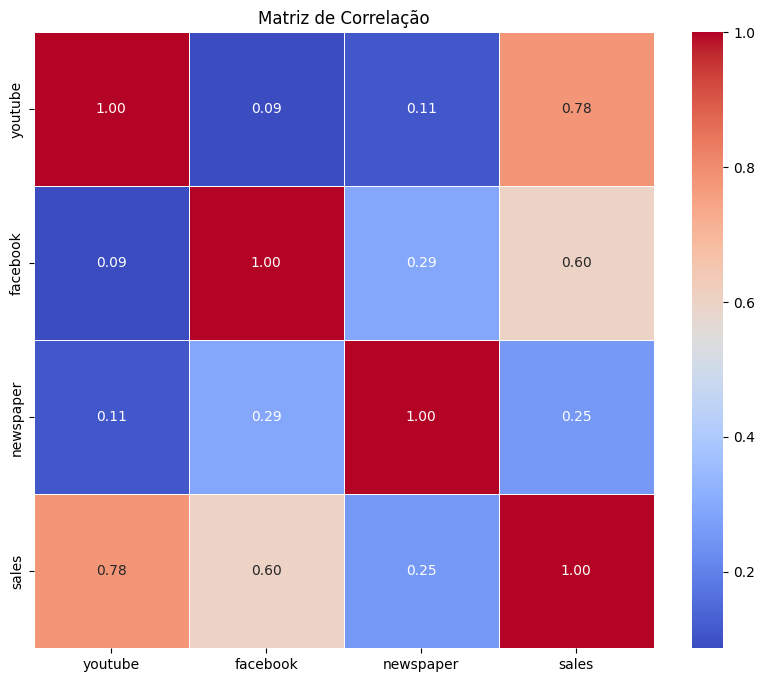

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 5.576790234026713
R-squared (R²): 0.872863085701216


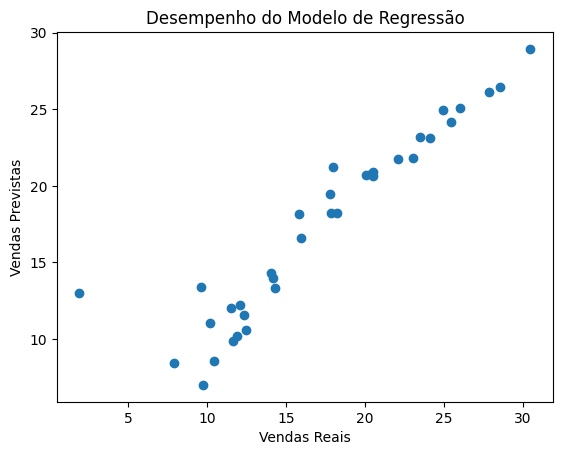

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Vendas Reais')
plt.ylabel('Vendas Previstas')
plt.title('Desempenho do Modelo de Regressão')
plt.show()

In [ ]:
novos_investimentos = [[1000, 500, 300]];
previsao_novos_dados = modelo.predict(novos_investimentos)
print(f'Previsão de vendas para novos investimentos: {previsao_novos_dados}')

Previsão de vendas para novos investimentos: [145.11522801]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
